<a href="https://colab.research.google.com/github/Rubina-Fathima/-EDA-Airbnb-NYC-2019-/blob/main/airbnb_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
import pandas as pd
import numpy as np
from numpy import mean
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path='/content/drive/MyDrive/AirBnB Bookings Analysis/Airbnb NYC 2019.csv'
My_Dataframe=pd.read_csv(path)
My_Dataframe.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
My_Dataframe.describe()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
#Datatypes of each column.
My_Dataframe.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
#Count of rows and columns in the dataset.
My_Dataframe.shape

(48895, 16)

There are 48895 records and 16 columns.

# Here i am checking the Dataframe with respect to reviews column.

In [7]:
#Comparing neighbourhood group with  count of number of reviews column.
count_of_reviews=My_Dataframe.groupby('neighbourhood_group')['number_of_reviews'].count()
count_of_reviews

neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: number_of_reviews, dtype: int64

In [8]:
#Comparing neighbourhood group with minimum reviews given by the groups.
min_review=My_Dataframe.groupby('neighbourhood_group')['number_of_reviews'].min()
min_review

neighbourhood_group
Bronx            0
Brooklyn         0
Manhattan        0
Queens           0
Staten Island    0
Name: number_of_reviews, dtype: int64

In [9]:
#Here i am trying to get records with minimum nights stayed and number of reviews given.
min_nights_review=My_Dataframe.groupby('minimum_nights')['number_of_reviews'].count()
min_nights_review

minimum_nights
1       12720
2       11696
3        7999
4        3303
5        3034
        ...  
480         1
500         5
999         3
1000        1
1250        1
Name: number_of_reviews, Length: 109, dtype: int64

As we can see from above code that reviews from customers who have booked for minimum nights are higher compared to customers who booked hotel for more than 480 days to stay.
Hence the customer with maximum stay should be of top priority for business.
Get to know the concerns and trouble faced by such customers and take  good reviews from them.


In [10]:

#I am trying to fetch records who appeared only once in the reviews column
sigle_reviews = My_Dataframe.loc[(My_Dataframe['number_of_reviews']==1)]
sigle_reviews

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
97,21644,"Upper Manhattan, New York",82685,Elliott,Manhattan,Harlem,40.82803,-73.94731,Private room,89,1,1,2018-10-09,0.11,1,365
143,32363,Fully Furnished Basement Apartment,140025,Fredah,Queens,Flushing,40.74028,-73.83168,Private room,140,2,1,2011-09-19,0.01,1,1
229,59121,"Nice, clean, safe, convenient 3BR",204539,Mark,Queens,Ridgewood,40.70411,-73.89934,Entire home/apt,140,14,1,2012-09-17,0.01,5,365
237,60673,Private Room/bath Luxurious Harlem,249372,Cynthia,Manhattan,Harlem,40.81583,-73.94707,Private room,175,2,1,2018-10-07,0.11,1,365
272,64707,Amazing Sunny & Breezy Home In the Heart of NYC,7310,Tilly,Manhattan,Little Italy,40.71702,-73.99811,Entire home/apt,90,14,1,2019-01-02,0.16,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48740,36413632,Spacious 2BR in Beautiful Brooklyn Heights,6608220,Matt,Brooklyn,Brooklyn Heights,40.69827,-73.99649,Entire home/apt,550,3,1,2019-07-07,1.00,1,230
48782,36425863,Lovely Privet Bedroom with Privet Restroom,83554966,Rusaa,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129,1,1,2019-07-07,1.00,1,147
48790,36427429,No.2 with queen size bed,257683179,H Ai,Queens,Flushing,40.75104,-73.81459,Private room,45,1,1,2019-07-07,1.00,6,339
48799,36438336,Seas The Moment,211644523,Ben,Staten Island,Great Kills,40.54179,-74.14275,Private room,235,1,1,2019-07-07,1.00,1,87


Here i am assuming that value '0' in the reviews column as no recorded reviews.
Hence i took the reviews=1 as succesfull recordings of reviews column.
I tried to draw host_id's of hosts who gave less reviews.

len() gives the total number of customers who recorded '1' as review or we can say unhappy customers.


In [11]:
#Comparing the count of room types given by customers who gave review only once.
sigle_reviews['room_type'].value_counts()

Private room       2554
Entire home/apt    2553
Shared room         137
Name: room_type, dtype: int64

The above code says that the room type which got low reviews was 'Shared Room'.
Private room and Entire home has equal number of reviews.


In [12]:
#I am trying to compare room type and price to find out the reason behing single review.
sigle_reviews.groupby('room_type')['price'].mean()

room_type
Entire home/apt    215.746181
Private room        86.903289
Shared room         78.978102
Name: price, dtype: float64

Average cost of room based on room type is same to all customers.


In [13]:
# Trying to relate single reviews given by hostname and  count of minimum_nights. 
sigle_reviews.groupby('host_name')['minimum_nights'].count()

host_name
(Email hidden by Airbnb)    1
A                           1
A-B                         1
AFI Apartments              4
Aamir                       1
                           ..
思铨                          1
睿                           1
诗月                          1
빈나                          1
소정                          1
Name: minimum_nights, Length: 2461, dtype: int64

This gives a list of hostname and count of minimum nights spend by them.
Hostnames who gave single review stayed for one night /or booked for single day according to airbnb dataset. 

In [14]:
#Here i want to know reviews of customers who has above average listings in the dataset. 
My_Dataframe['calculated_host_listings_count'].mean() #gives 7 as average listings in output
My_Dataframe['number_of_reviews'].mean() # gives 23 as average reviews
review_home_records = My_Dataframe.loc[(My_Dataframe['number_of_reviews'] <23)& (My_Dataframe['calculated_host_listings_count']>7)]
review_home_records['name'].value_counts().head(10)


Hillside Hotel                                        18
Artsy Private BR in Fort Greene Cumberland            10
IN MINT CONDITION-STUDIOS EAST 44TH/UNITED NATIONS     6
A CLASSIC NYC NEIGHBORHOOD-EAST 86TH/5TH AVENUE        5
Are You Ready for Central Park State of Mind?          4
Modern, Cozy Apt Share for Young Professionals         4
❤ of Manhattan | Fantastic 1 Bedroom                   4
Sonder | The Biltmore | Spacious 1BR + Kitchen         4
Sonder | The Biltmore | Stunning 1BR + Sofa Bed        4
Cozy apartment by Central Park                         3
Name: name, dtype: int64

Name column of dataset represents the name of the hotel, Here **Hillside Hotel **although listed for above average bookings is facing below average reviews.
second hotel which stands under this criteria is **"Artsy Private BR in Fort Greene Cumberland"**
Reason could be the low maintenance due to high bookings of customers.

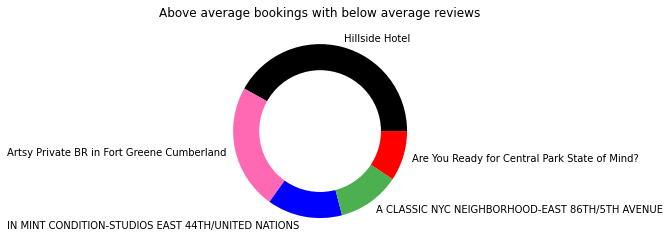

In [15]:
#Here im trying to show low reviews with respect to high bookings of hotel.
high_booking_low_review=review_home_records['name'].value_counts().head(5)
mylabels = ["Hillside Hotel", "Artsy Private BR in Fort Greene Cumberland", "IN MINT CONDITION-STUDIOS EAST 44TH/UNITED NATIONS ", "A CLASSIC NYC NEIGHBORHOOD-EAST 86TH/5TH AVENUE","Are You Ready for Central Park State of Mind?"]
length_list = [0.2, 0, 0, 0,0 ]
mycolors = ["black", "hotpink", "b", "#4CAF50","red"]
plt.pie(high_booking_low_review,labels=mylabels,colors=mycolors)
plt.title("Above average bookings with below average reviews")
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [16]:
count_of_rooms=My_Dataframe['room_type'].value_counts()
count_of_rooms

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

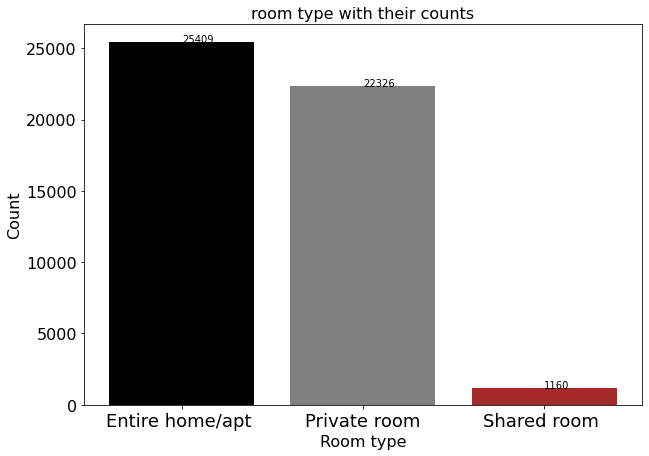

In [17]:

#Count of the rooms is calculated from the above code can be used to plot a graph for effective visualization.
x = ["Entire home/apt ", "Private room", "Shared room "]
y = [25409, 22326,  1160]
plt.figure(figsize=(10,7)) 
plt.bar(x,y,color=['black','grey','brown'])
plt.title('room type with their counts',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.xlabel('Room type',fontsize=16)
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
for index,data in enumerate(y):
  plt.text(x=index,y=data+29,s=f"{data}")
plt.show()

Entire home/apt is shown to be listed with high bookings of 25409 and Shared room is recorded as least booked room type with 1160 booking count as per the dataset.

In [18]:
Less_review_host = My_Dataframe.loc[(My_Dataframe['number_of_reviews'].min())]
Less_review_host

id                                                              2539
name                              Clean & quiet apt home by the park
host_id                                                         2787
host_name                                                       John
neighbourhood_group                                         Brooklyn
neighbourhood                                             Kensington
latitude                                                    40.64749
longitude                                                  -73.97237
room_type                                               Private room
price                                                            149
minimum_nights                                                     1
number_of_reviews                                                  9
last_review                                               2018-10-19
reviews_per_month                                               0.21
calculated_host_listings_count    

Above code fetches the details of the customer named "John" who has awarded less reviews on 2018-10-19.
Feedback from John will help to focus on areas where hotel is failing to improve the customer satisfaction.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


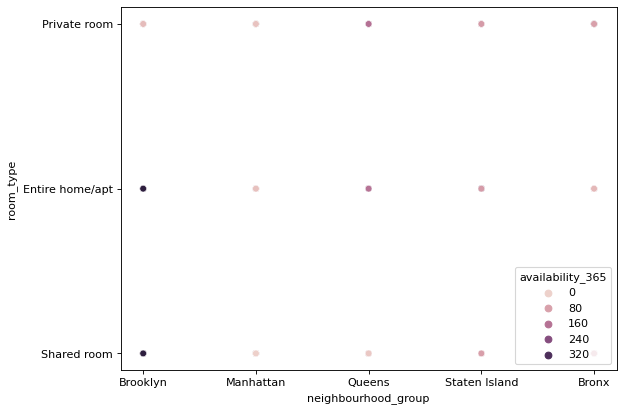

In [19]:

#Using Scatterplot to check if any relation comes out of room type and availability column.
plt.figure(figsize=(8,6), dpi = 80)
sns.scatterplot(My_Dataframe.neighbourhood_group,My_Dataframe.room_type,hue=My_Dataframe.availability_365)
plt.ioff()

Above Scatterplot shows Neighbourhood group Brooklyn has high availability of Shared room and Entire home/apt.


In [20]:
#Comparing the price variation with respect to availability column.
My_Dataframe.groupby(['availability_365'])['price'].mean().tail(10)

availability_365
356    138.000000
357    177.536842
358    212.594444
359    180.925926
360    154.970588
361    157.108108
362    201.096386
363    200.644351
364    260.372709
365    250.769884
Name: price, dtype: float64

In [21]:
My_Dataframe.groupby(['availability_365'])['price'].mean().head(10)

availability_365
0    136.032111
1    129.509804
2    145.944444
3    136.486928
4    135.759657
5    134.179412
6    123.612245
7    135.123288
8    131.047210
9    146.445596
Name: price, dtype: float64

Above observations show as the availability increases price also increases.
availability and price of rooms is directly proportional.

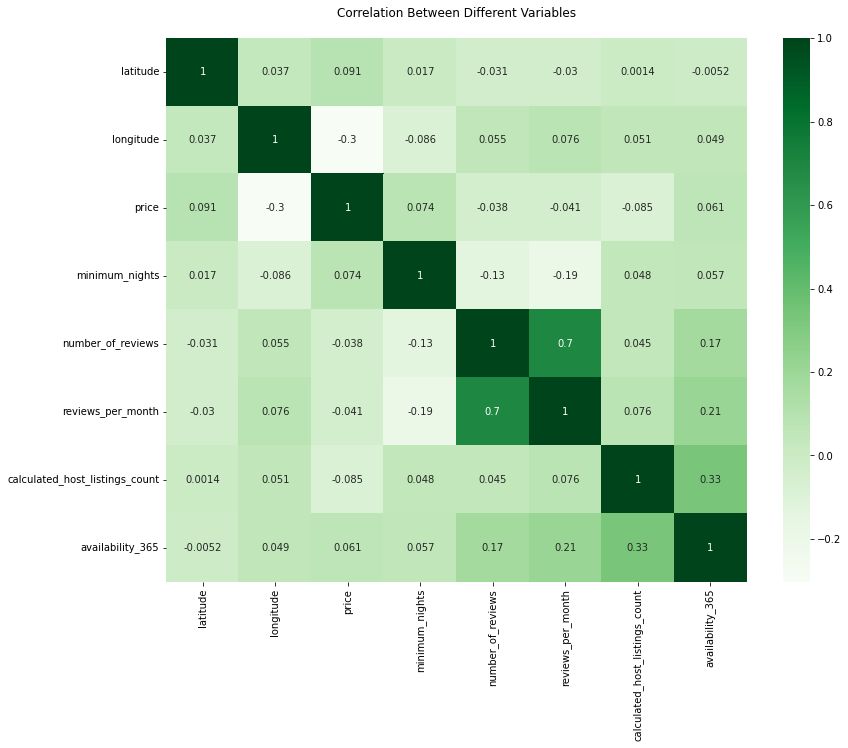

In [32]:
#Here im trying to exclude few columns to have a simple correlation map.
My_Dataframe_dropped_columns=My_Dataframe.drop(['id','host_id'],axis=1)
corr = My_Dataframe_dropped_columns.corr(method='kendall')
plt.figure(figsize=(13,10))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

Heat map gives the correlation between variable in the dataframe.
columns Price and longitude are negatively correlated that means if longitude varies price will change inversely.
Similarly columns reviews per month and minimum nights vary inversely.

In [23]:
#Date which was mostly reviewed.
My_Dataframe['last_review'].mode()

0    2019-06-23
dtype: object

Data set consists of entries till 2019.

In [24]:
My_Dataframe.reviews_per_month.isnull().sum()

10052

In [25]:

#changing the null values of'reviews_per_month' with 0
My_Dataframe.fillna({'reviews_per_month':0}, inplace=True)
My_Dataframe.reviews_per_month.isnull().sum()

0

Reviews_per_month column consists of null values, replace them with '0' for our convenience.


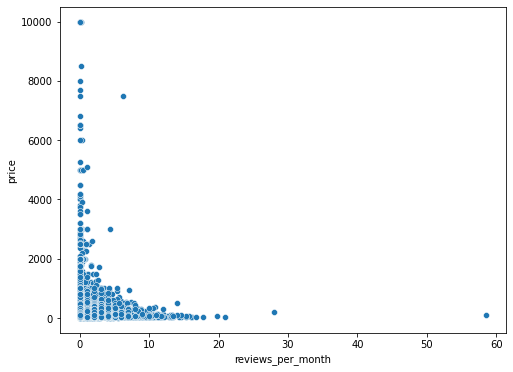

In [26]:
#Visualization of price and reviews column.
plt.figure(figsize=(8,6))
sns.scatterplot(y=My_Dataframe['price'],x=My_Dataframe['reviews_per_month'])

Above scatterplot shows most of the reviews per month were recorded below 10 with bookings which are less expensive under price 2000.

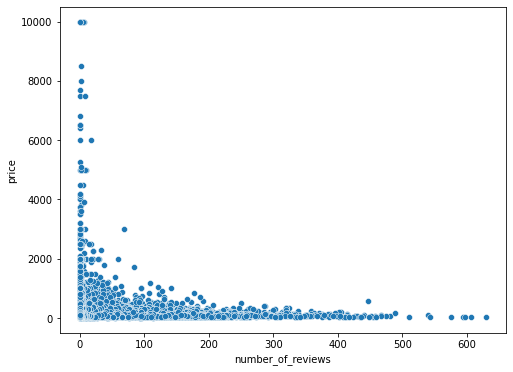

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(y=My_Dataframe['price'],x=My_Dataframe['number_of_reviews'])

Here scatterplot shows the number of reviews given by customers is less when price is between 8000 and 1000.

# CONCLUSION

* Availability and Price are directly proportional,
  Hotel with low price  should be focused to increase their availability for    
  profits.

* Customer reviews are at high priority for online booking platforms.
  Reviews are given by customers who have lesser minimum nights booking.
  Customers those who have stayed for longer should also be considered to      
  record their reviews equally.

*Most of the reviews are given in the month of June ,thus it can be considered 
 as favourable time of the year for travel.In the month of June try to increase 
 the availability of rooms.

*Shared room bookings are lesser compared to private room although the price variation is low.Hence come up with preferences of customers who share the room.
Feedback from customers will help to adopt a change in the system.
